# Import what you need

In [ ]:
!pip install geopandas

In [ ]:
pip install linearmodels


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random
from linearmodels.panel import PanelOLS

# Load shapefile

In [ ]:
upload = files.upload()
gdf = gpd.read_file("/content/cty_shp.gpkg")

Saving cty_shp.gpkg to cty_shp.gpkg


In [ ]:
import geopandas as gpd

# read the GeoPackage file
gdf = gpd.read_file('/content/cty_shp.gpkg')

In [ ]:
gdf.head()
print(gdf["NAME"].dtype)
print(gdf["RBZ"].dtype)
print(gdf["TYPE"].dtype)

object
object
object


In [ ]:
gdf.columns

Index(['NAME', 'RBZ', 'TYPE', 'geometry'], dtype='object')

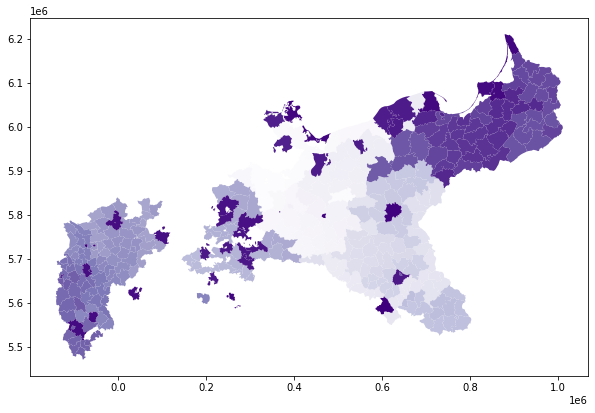

In [ ]:
gdf.plot(figsize=(10, 10),cmap='Purples')
plt.show()

# Load datafile

In [ ]:
upload = files.upload()
df = pd.read_csv('/content/student dataset.csv')

Saving student dataset.csv to student dataset.csv


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/student dataset.csv')

In [ ]:
df.head()

,org_type,org_name,match_name,match_type,org_rbz,org_prv,match_rbz,o_craft_1849,o_ind_1849,o_serv_1849,...,rkm_1845,rkm_1844,rkm_1843,rkm_1842,rkm_1841,rkm_1840,rkm_1839,rkm_1838,rkm_1837,area
0,Landkreis,Aachen,AACHEN,1,Aachen,Rheinland,AAC,3319,7080,10270,...,29.670000,29.670000,29.670000,21.010000,21.010000,0.000,0.0,0.0,0,363.845640
1,Stadtkreis,Aachen,AACHEN,2,Aachen,Rheinland,AAC,4469,19775,6222,...,10.700000,10.700000,10.700000,10.700000,10.700000,0.000,0.0,0.0,0,42.025661
2,Landkreis,Düren,DUREN,0,Aachen,Rheinland,AAC,2729,4574,5703,...,22.370001,22.370001,22.370001,22.370001,22.370001,11.185,0.0,0.0,0,544.587890
3,Landkreis,Erkelenz,ERKELENZ,0,Aachen,Rheinland,AAC,1898,1334,2843,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0,268.380680
4,Landkreis,Eupen,EUPEN,0,Aachen,Rheinland,AAC,1498,4546,1343,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0,166.114380


# Merge datafile and shapefile

In [ ]:
df["match_type"] = df["match_type"].astype(object)
gdf['TYPE'] = gdf['TYPE'].astype(int)
merged_df = gdf.merge(df, left_on=["NAME", "RBZ", "TYPE"], right_on=["match_name", "match_rbz", "match_type"])
merged_df.head()

,NAME,RBZ,TYPE,geometry,org_type,org_name,match_name,match_type,org_rbz,org_prv,...,rkm_1845,rkm_1844,rkm_1843,rkm_1842,rkm_1841,rkm_1840,rkm_1839,rkm_1838,rkm_1837,area
0,OSTPRIGNITZ,POT,0,"MULTIPOLYGON (((322058.327 5910792.829, 322919...",Landkreis,Ost-Priegnitz,OSTPRIGNITZ,0,Potsdam (excl. Berlin),Brandenburg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1946.5865
1,RUPPIN,POT,0,"MULTIPOLYGON (((370187.020 5894707.263, 369618...",Landkreis,Ruppin,RUPPIN,0,Potsdam (excl. Berlin),Brandenburg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1785.1674
2,WESTHAVELLAND,POT,0,"MULTIPOLYGON (((351561.700 5815316.600, 351591...",Landkreis,West-Havelland,WESTHAVELLAND,0,Potsdam (excl. Berlin),Brandenburg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1311.3241
3,TEMPLIN,POT,0,"MULTIPOLYGON (((423206.900 5900285.900, 423692...",Landkreis,Templin,TEMPLIN,0,Potsdam (excl. Berlin),Brandenburg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1467.6155
4,PRENZLAU,POT,0,"MULTIPOLYGON (((444890.900 5930163.500, 445335...",Landkreis,Prenzlau,PRENZLAU,0,Potsdam (excl. Berlin),Brandenburg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1104.5825


In [ ]:
merged_df.columns

Index(['NAME', 'RBZ', 'TYPE', 'geometry', 'org_type', 'org_name', 'match_name',
       'match_type', 'org_rbz', 'org_prv', 'match_rbz', 'o_craft_1849',
       'o_ind_1849', 'o_serv_1849', 'o_agr_1849', 'p_1821', 'p_1831', 'c_1831',
       'c_1832', 'c_1833', 'p_1837', 'c_1836', 'c_1837', 'p_1840', 'p_1843',
       'p_1846', 'c_1848', 'p_1849', 'c_1849', 'c_1850', 'c_1851', 'p_1852',
       'c_1852', 'c_1853', 'c_1854', 'p_1855', 'c_1855', 'c_1856', 'c_1857',
       'c_1858', 'c_1859', 'p_1861', 'p_1864', 'c_1866', 'p_1867', 'c_1867',
       'c_1868', 'p_1871', 'c_1873', 'c_1874', 'p_1875', 'rkm_1875',
       'rkm_1874', 'rkm_1873', 'rkm_1872', 'rkm_1871', 'rkm_1870', 'rkm_1869',
       'rkm_1868', 'rkm_1867', 'rkm_1866', 'rkm_1865', 'rkm_1864', 'rkm_1863',
       'rkm_1862', 'rkm_1861', 'rkm_1860', 'rkm_1859', 'rkm_1858', 'rkm_1857',
       'rkm_1856', 'rkm_1855', 'rkm_1854', 'rkm_1853', 'rkm_1852', 'rkm_1851',
       'rkm_1850', 'rkm_1849', 'rkm_1848', 'rkm_1847', 'rkm_1846', 'rkm_184

# These are for tests:

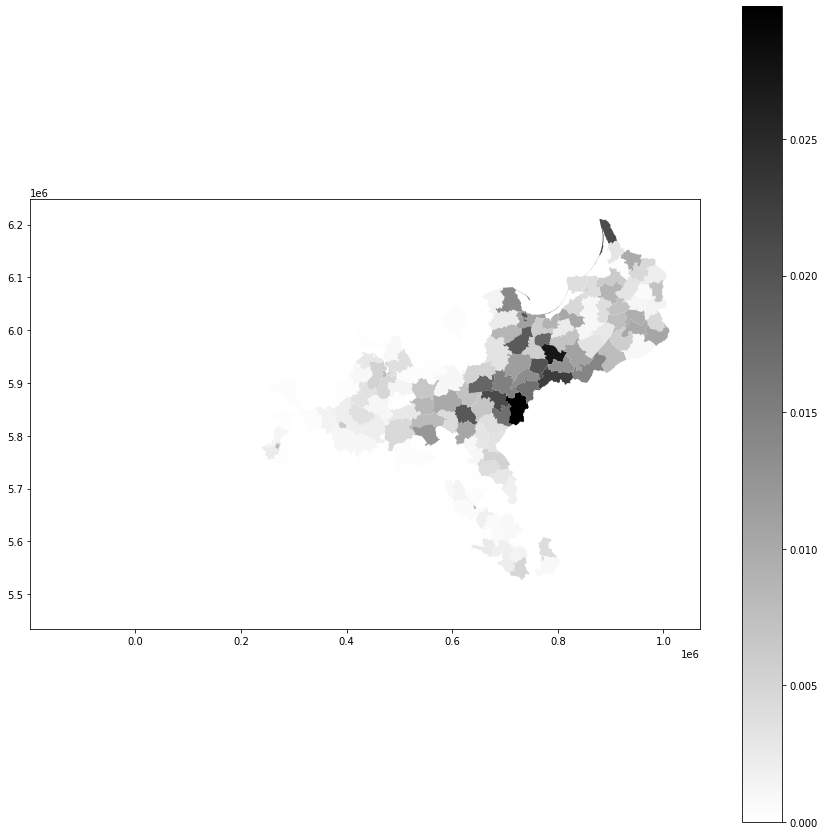

In [ ]:
merged_df.plot(column='area', cmap='binary', legend=True, figsize=(15, 15))
plt.show()

# How did railroads shape regional population growth?

In [ ]:
row = gdf[gdf['match_name'] == 'AACHEN', gdf['match_type'] == 1,gdf['match_rbz'] == 'AAC']

# Create a list of years
years = [f"year{i}" for i in range(1, 31)]

# Create a list of values for the row of interest
values = [row[f"x_{year}"].values[0] for year in years]

# Plot the data
plt.plot(years, values)
plt.xlabel("Years")
plt.ylabel("Values")
plt.title("Values over Years for name1")
plt.show()

# scaled_rkm_ ro kardam scaledrkm_

In [ ]:
for col in df.columns:
    if col.startswith('rkm_'):
        # Create a new column for the scaled values
        merged_df['scaled'+ col] = merged_df[col] / merged_df['area']

# Print the updated DataFrame
merged_df.columns

Index(['NAME', 'RBZ', 'TYPE', 'geometry', 'org_type', 'org_name', 'match_name',
       'match_type', 'org_rbz', 'org_prv',
       ...
       'scaledrkm_1846', 'scaledrkm_1845', 'scaledrkm_1844', 'scaledrkm_1843',
       'scaledrkm_1842', 'scaledrkm_1841', 'scaledrkm_1840', 'scaledrkm_1839',
       'scaledrkm_1838', 'scaledrkm_1837'],
      dtype='object', length=307)

In [ ]:
# create a new dataframe with the desired columns
new_df = pd.DataFrame(columns=["year", "sum_rkm", "sum_area"])

# iterate over each year
for year in range(1837, 1875):

  # create a filter for rows where the TYPE is 0 and the year column matches the current year
  filter = (merged_df["TYPE"] == 0) & (merged_df[f"rkm_{year}"].notna())

  # calculate the sum of rkm and area for the current year
  sum_rkm = merged_df.loc[filter, f"rkm_{year}"].sum()
  sum_area = merged_df.loc[filter, "area"].sum()

  # add the results to the new dataframe
  new_df.loc[len(new_df)] = [year, sum_rkm, sum_area]

new_df.head()

,year,sum_rkm,sum_area
0,1837.0,0.000000,269278.20792
1,1838.0,38.560000,269278.20792
2,1839.0,74.560001,269278.20792
3,1840.0,145.325000,269278.20792
4,1841.0,300.139996,269278.20792


In [ ]:
# Create a list of years from 1837 to 1874
years = [str(year) for year in range(1837, 1875)]

# Create a new DataFrame with columns for year, sum_rkm, and sum_area
new_df = pd.DataFrame({'year': years, 'sum_rkm': [0]*38, 'sum_area': [0]*38})

# Loop over the years and calculate the sum of rkm and area for each year
for i, year in enumerate(years):
    sum_rkm = merged_df[f'rkm_{year}'][(merged_df['TYPE'] == 0) | (merged_df['TYPE'] == 1)].sum()
    sum_area = merged_df['area'][(merged_df['TYPE'] == 0) | (merged_df['TYPE'] == 1)].sum()
    new_df.at[i, 'sum_rkm'] = sum_rkm
    new_df.at[i, 'sum_area'] = sum_area
    if f'p_{year}' in merged_df.columns:
        sum_p = merged_df[f'p_{year}'][(merged_df['TYPE'] == 0) | (merged_df['TYPE'] == 1)].sum()
        new_df.at[i, 'sum_p'] = sum_p
    if f'c_{year}' in merged_df.columns:
        sum_c = merged_df[f'c_{year}'][(merged_df['TYPE'] == 0) | (merged_df['TYPE'] == 1)].sum()
        new_df.at[i, 'sum_c'] = sum_c
new_df['scaled_rkm'] = new_df['sum_rkm'] / new_df['sum_area']
new_df.head(10)

,year,sum_p,sum_c
0,1821,1.093581e+07,NaN
1,1822,NaN,NaN
2,1823,NaN,NaN
3,1824,NaN,NaN
4,1825,NaN,NaN
5,1826,NaN,NaN
6,1827,NaN,NaN
7,1828,NaN,NaN
8,1829,NaN,NaN
9,1830,NaN,NaN


In [ ]:
# Create a list of years from 1837 to 1874
years = [str(year) for year in range(1837, 1875)]

# Create a new DataFrame with columns for year, sum_rkm, and sum_area
new_df2 = pd.DataFrame({'year': years, 'sum_rkm': [0]*38, 'sum_area': [0]*38})

# Loop over the years and calculate the sum of rkm and area for each year
for i, year in enumerate(years):
    sum_rkm = merged_df[f'rkm_{year}'][merged_df['TYPE'] == 2].sum()
    sum_area = merged_df['area'][merged_df['TYPE'] == 2].sum()
    new_df2.at[i, 'sum_rkm'] = sum_rkm
    new_df2.at[i, 'sum_area'] = sum_area
    if f'p_{year}' in merged_df.columns:
        sum_p = merged_df[f'p_{year}'][merged_df['TYPE'] == 2].sum()
        new_df2.at[i, 'sum_p'] = sum_p
new_df2['scaled_rkm'] = new_df2['sum_rkm'] / new_df2['sum_area']
new_df2.head(10)

,year,sum_rkm,sum_area,sum_p,scaled_rkm
0,1837,0.00,1529.981624,850143.0,0.000000
1,1838,4.66,1529.981624,NaN,0.003046
2,1839,9.16,1529.981624,NaN,0.005987
3,1840,11.86,1529.981624,936078.0,0.007752
4,1841,31.47,1529.981624,NaN,0.020569
5,1842,61.71,1529.981624,NaN,0.040334
6,1843,71.71,1529.981624,995026.0,0.046870
7,1844,71.71,1529.981624,NaN,0.046870
8,1845,71.71,1529.981624,NaN,0.046870
9,1846,81.98,1529.981624,1094617.0,0.053582


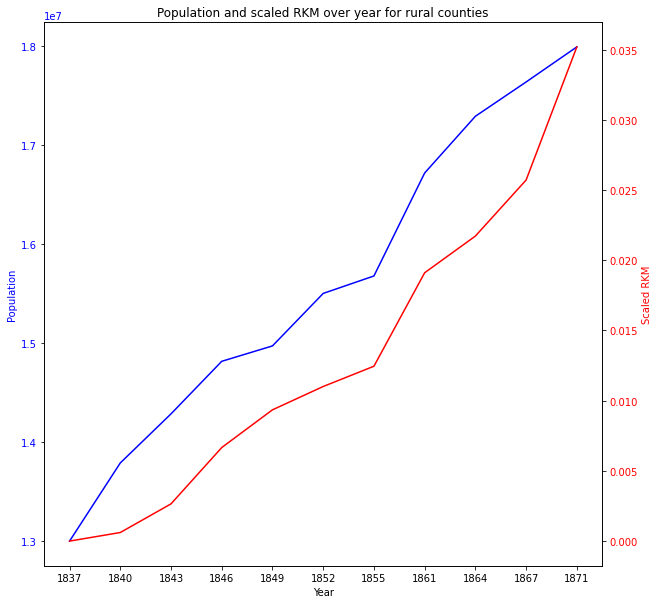

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
new_df = new_df.dropna(subset=['sum_p'])
fig, ax1 = plt.subplots(figsize=(10, 10))

# plot sum_p
ax1.plot(new_df['year'], np.nan_to_num(new_df['sum_p']), color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# create second y-axis
ax2 = ax1.twinx()

# plot scaled_rkm
ax2.plot(new_df['year'], new_df['scaled_rkm'], color='red')
ax2.set_ylabel('Scaled RKM', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# set title
plt.title('Population and scaled RKM over year for rural counties')

# show plot
plt.show()


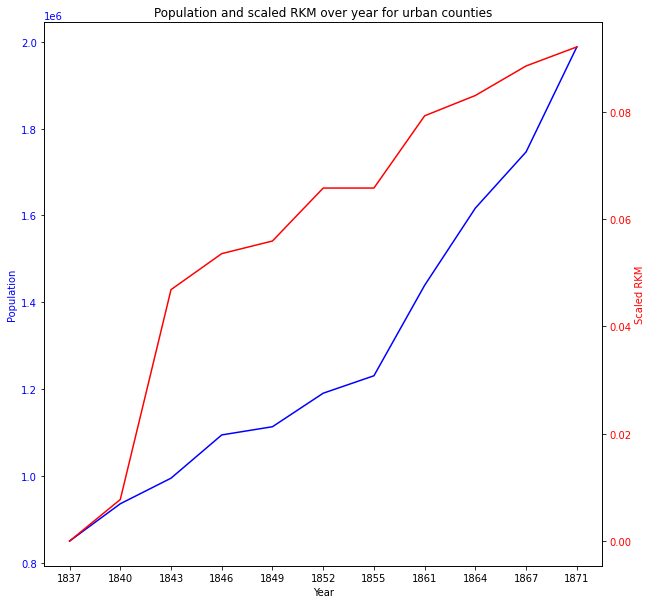

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
new_df2 = new_df2.dropna(subset=['sum_p'])
fig, ax1 = plt.subplots(figsize=(10, 10))

# plot sum_p
ax1.plot(new_df2['year'], np.nan_to_num(new_df2['sum_p']), color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# create second y-axis
ax2 = ax1.twinx()

# plot scaled_rkm
ax2.plot(new_df2['year'], new_df2['scaled_rkm'], color='red')
ax2.set_ylabel('Scaled RKM', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# set title
plt.title('Population and scaled RKM over year for urban counties')

# show plot
plt.show()


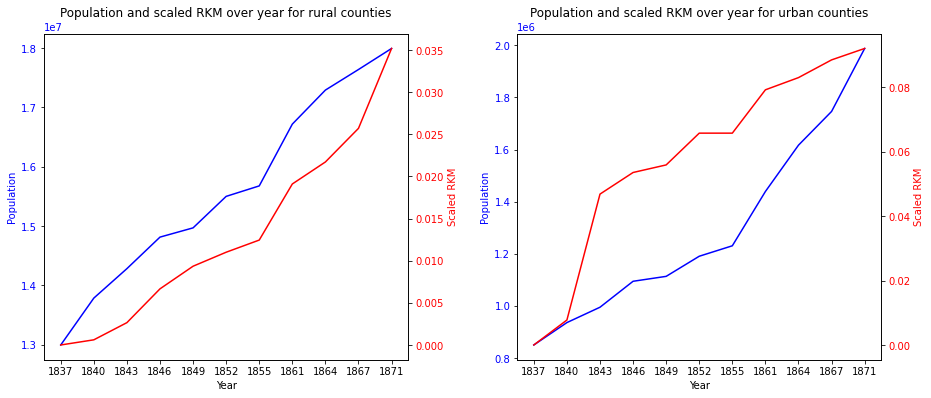

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for TYPE = 0 & 1
ax1 = axs[0]
ax1.plot(new_df['year'], np.nan_to_num(new_df['sum_p']), color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Population and scaled RKM over year for rural counties')

ax2 = ax1.twinx()
ax2.plot(new_df['year'], new_df['scaled_rkm'], color='red')
ax2.set_ylabel('Scaled RKM', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Plot for TYPE = 2
ax3 = axs[1]
ax3.plot(new_df2['year'], np.nan_to_num(new_df2['sum_p']), color='blue')
ax3.set_xlabel('Year')
ax3.set_ylabel('Population', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_title('Population and scaled RKM over year for urban counties')

ax4 = ax3.twinx()
ax4.plot(new_df2['year'], new_df2['scaled_rkm'], color='red')
ax4.set_ylabel('Scaled RKM', color='red')
ax4.tick_params(axis='y', labelcolor='red')

# Set title for the entire figure
#fig.suptitle('Population and scaled RKM over year for rural and urban counties')

fig.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()
fig.savefig('myplot.png', dpi=300)
files.download('myplot.png')

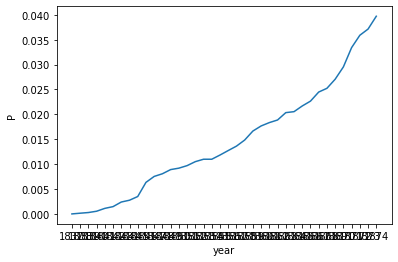

In [ ]:
# plot the mean p values over time
plt.plot(new_df['year'], new_df['scaled_rkm'])
plt.xlabel('year')
plt.ylabel('P')
plt.show()

In [ ]:
# create a new dataframe to hold mean rkm scaled values for each year
mean_df = pd.DataFrame(columns=['Year', 'Mean RKM Scaled'])

# iterate over each year
for year in range(1837, 1875):
    # filter rows for the current year
    year_df = merged_df[merged_df[f'rkm_{year}_scaled'].notnull()]
    # filter rows with TYPE=0
    year_df = year_df[year_df['TYPE'] == 0]
    # calculate the mean of rkm_scaled_year for the current year
    mean_rkm_scaled = year_df[f'rkm_{year}_scaled'].mean()
    # add the mean to the mean_df dataframe
    mean_df = mean_df.append({'Year': year, 'Mean RKM Scaled': mean_rkm_scaled}, ignore_index=True)

# plot the mean rkm scaled values over time
plt.plot(mean_df['Year'], mean_df['Mean RKM Scaled'])
plt.xlabel('Year')
plt.ylabel('Mean RKM Scaled')
plt.show()

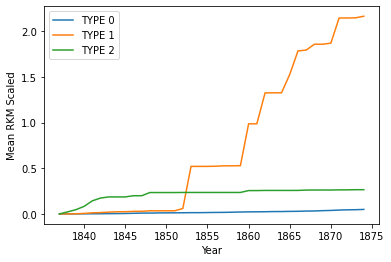

In [ ]:
# create a new dataframe to hold mean rkm scaled values for each year and each type
mean_df = pd.DataFrame(columns=['Year', 'Mean RKM Scaled', 'TYPE'])

# iterate over each year
for year in range(1837, 1875):
    # filter rows for the current year
    year_df = merged_df[merged_df[f'rkm_{year}_scaled'].notnull()]
    for t in [0, 1, 2]:
        # filter rows with the current type
        type_df = year_df[year_df['TYPE'] == t]
        # calculate the mean of rkm_scaled_year for the current year and type
        mean_rkm_scaled = type_df[f'rkm_{year}_scaled'].mean()
        # add the mean to the mean_df dataframe
        mean_df = mean_df.append({'Year': year, 'Mean RKM Scaled': mean_rkm_scaled, 'TYPE': t}, ignore_index=True)

# plot the mean rkm scaled values over time for each type
for t in [0, 1, 2]:
    type_mean_df = mean_df[mean_df['TYPE'] == t]
    plt.plot(type_mean_df['Year'], type_mean_df['Mean RKM Scaled'], label=f'TYPE {t}')
plt.xlabel('Year')
plt.ylabel('Mean RKM Scaled')
plt.legend()
plt.show()

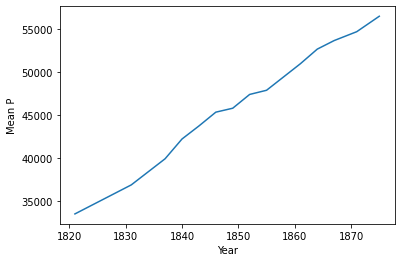

In [ ]:
# create a new dataframe to hold mean p_year values for each year
mean_df = pd.DataFrame(columns=['Year', 'Mean P'])

# iterate over each year
for year in range(1821, 1876):
    # check if the column exists for the current year
    if f'p_{year}' in merged_df.columns:
        # filter rows for the current year
        year_df = merged_df[merged_df[f'p_{year}'].notnull()]
        # filter rows with TYPE=0
        year_df = year_df[year_df['TYPE'] == 0]
        # calculate the mean of p_year for the current year
        mean_p = year_df[f'p_{year}'].mean()
        # add the mean to the mean_df dataframe
        mean_df = mean_df.append({'Year': year, 'Mean P': mean_p}, ignore_index=True)

# plot the mean p values over time
plt.plot(mean_df['Year'], mean_df['Mean P'])
plt.xlabel('Year')
plt.ylabel('Mean P')
plt.show()


# How did railroads shape regional population growth?

<ipython-input-52-1edb754f87dc>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_rkm_df = mean_rkm_df.append({'Year': year, 'Mean RKM Scaled': mean_rkm_scaled}, ignore_index=True)
<ipython-input-52-1edb754f87dc>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_rkm_df = mean_rkm_df.append({'Year': year, 'Mean RKM Scaled': mean_rkm_scaled}, ignore_index=True)
<ipython-input-52-1edb754f87dc>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_rkm_df = mean_rkm_df.append({'Year': year, 'Mean RKM Scaled': mean_rkm_scaled}, ignore_index=True)
<ipython-input-52-1edb754f87dc>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean

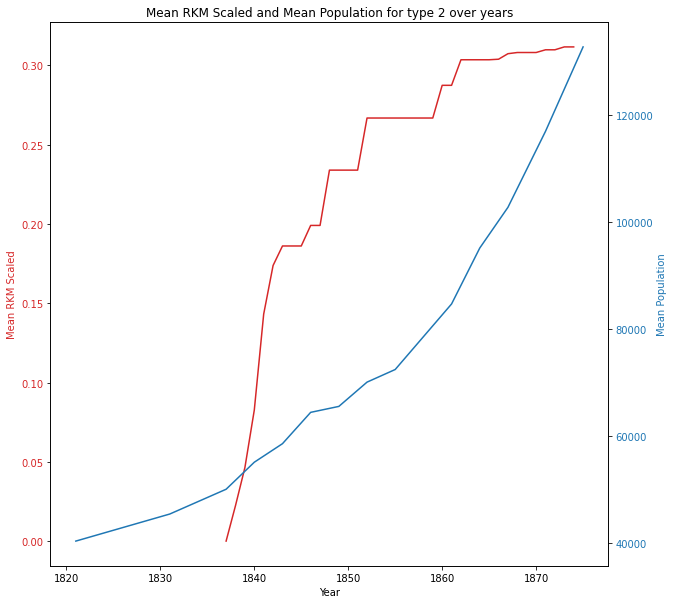

In [ ]:
# create a new dataframe to hold mean rkm scaled values for each year
mean_rkm_df = pd.DataFrame(columns=['Year', 'Mean RKM Scaled'])

# iterate over each year
for year in range(1837, 1875):
    # filter rows for the current year
    year_df = merged_df[merged_df[f'rkm_{year}_scaled'].notnull()]
    # filter rows with TYPE=0
    year_df = year_df[year_df['TYPE'] == 2]
    # calculate the mean of rkm_scaled_year for the current year
    mean_rkm_scaled = year_df[f'rkm_{year}_scaled'].mean()
    # add the mean to the mean_rkm_df dataframe
    mean_rkm_df = mean_rkm_df.append({'Year': year, 'Mean RKM Scaled': mean_rkm_scaled}, ignore_index=True)

# create a new dataframe to hold mean p_year values for each year
mean_p_df = pd.DataFrame(columns=['Year', 'Mean P'])

# iterate over each year
for year in range(1821, 1876):
    # check if the column exists for the current year
    if f'p_{year}' in merged_df.columns:
        # filter rows for the current year
        year_df = merged_df[merged_df[f'p_{year}'].notnull()]
        # filter rows with TYPE=0
        year_df = year_df[year_df['TYPE'] == 2]
        # calculate the mean of p_year for the current year
        mean_p = year_df[f'p_{year}'].mean()
        # add the mean to the mean_p_df dataframe
        mean_p_df = mean_p_df.append({'Year': year, 'Mean P': mean_p}, ignore_index=True)

# create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 10))

# plot the mean rkm scaled values on the left y-axis
color1 = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean RKM Scaled', color=color1)
ax1.plot(mean_rkm_df['Year'], mean_rkm_df['Mean RKM Scaled'], color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# create a second y-axis on the right side
ax2 = ax1.twinx()

# plot the mean p values on the right y-axis
color2 = 'tab:blue'
ax2.set_ylabel('Mean Population', color=color2)
ax2.plot(mean_p_df['Year'], mean_p_df['Mean P'], color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# set the title and show the plot
plt.title('Mean RKM Scaled and Mean Population for type 2 over years')
plt.show()


# How did railroads shape economic growth?

In [ ]:
merged_df['eco_growth_1849'] = (merged_df['o_ind_1849'] + merged_df['o_serv_1849'] + merged_df['o_agr_1849'] + merged_df['o_craft_1849']) / merged_df['p_1849']

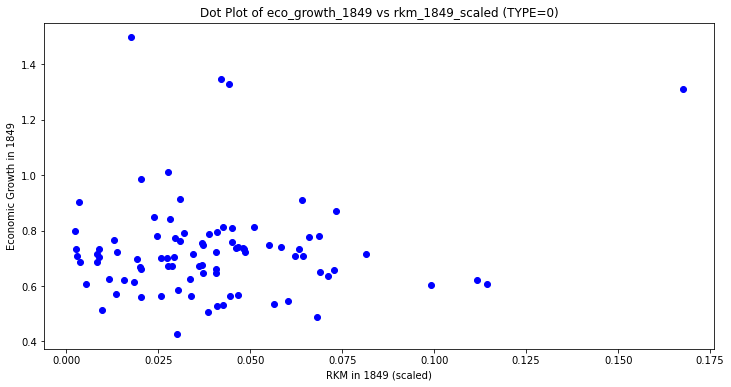

In [ ]:
# filter rows where TYPE=0 and rkm_1849_scaled is not 0
df_filtered = merged_df[(merged_df['TYPE'] == 0) & (merged_df['rkm_1849_scaled'] != 0)]
#df_filtered = merged_df[(merged_df['TYPE'] == 0)]
# create a scatter plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df_filtered['rkm_1849_scaled'], df_filtered['eco_growth_1849'], color='blue')

# set plot title and labels
ax.set_title('Dot Plot of eco_growth_1849 vs rkm_1849_scaled (TYPE=0)')
ax.set_xlabel('RKM in 1849 (scaled)')
ax.set_ylabel('Economic Growth in 1849')

plt.show()

# Economics growth versus RKM scaled in 1849

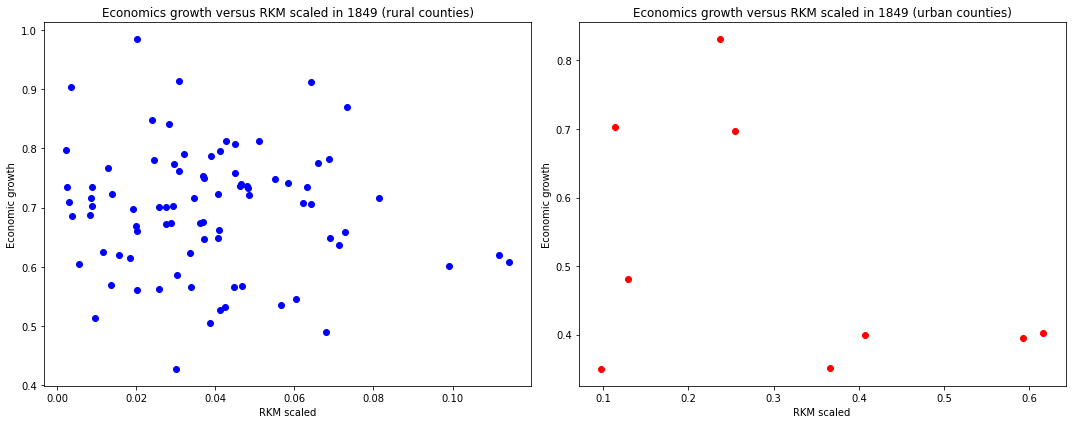

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# filter rows where rkm_1849_scaled is not 0
#df_filtered = merged_df[merged_df['rkm_1849_scaled'] != 0]
df_filtered = merged_df

# create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# plot for TYPE=0
df_type_0 = df_filtered[(df_filtered['TYPE'] == 0) & (merged_df['rkm_1849_scaled'] != 0) & (merged_df['eco_growth_1849'] < 1)]
axs[0].scatter(df_type_0['rkm_1849_scaled'], df_type_0['eco_growth_1849'], color='blue')
axs[0].set_title('Economics growth versus RKM scaled in 1849 (rural counties)')
axs[0].set_xlabel('RKM scaled')
axs[0].set_ylabel('Economic growth')

# plot for TYPE=1
df_type_1 = df_filtered[(df_filtered['TYPE'] == 2) & (merged_df['rkm_1849_scaled'] != 0) & (merged_df['eco_growth_1849'] < 1)]
axs[1].scatter(df_type_1['rkm_1849_scaled'], df_type_1['eco_growth_1849'], color='red')
axs[1].set_title('Economics growth versus RKM scaled in 1849 (urban counties)')
axs[1].set_xlabel('RKM scaled')
axs[1].set_ylabel('Economic growth')

# plot for TYPE=2
#df_type_2 = df_filtered[df_filtered['TYPE'] == 2]
#axs[2].scatter(df_type_2['rkm_1849_scaled'], df_type_2['eco_growth_1849'], color='red')
#axs[2].set_title('TYPE=2')
#axs[2].set_xlabel('RKM in 1849 (scaled)')
#axs[2].set_ylabel('Economic Growth in 1849')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()
fig.savefig('myplot.png', dpi=300)
files.download('myplot.png')

# How did railroads shape industrialization?


In [ ]:
merged_df['eco_ind_1849'] = (merged_df['o_ind_1849']) / merged_df['p_1849']

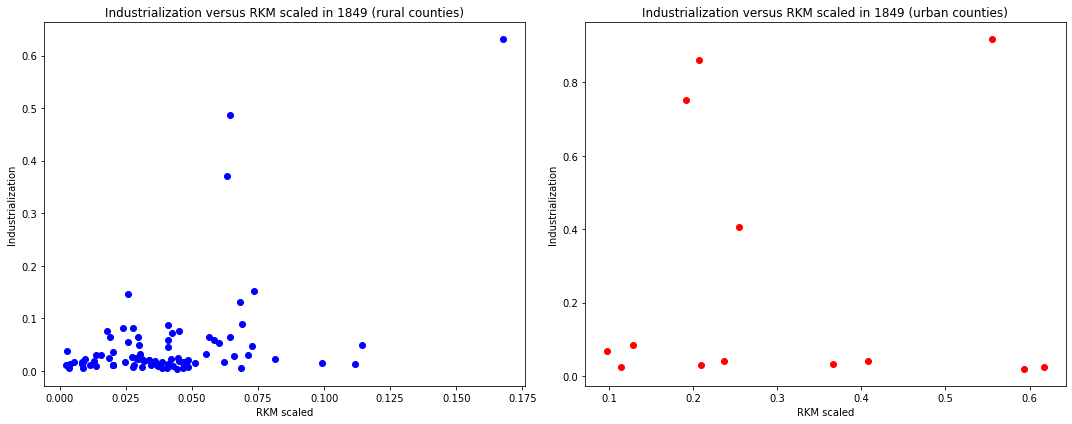

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# filter rows where rkm_1849_scaled is not 0
#df_filtered = merged_df[merged_df['rkm_1849_scaled'] != 0]
df_filtered = merged_df

# create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# plot for TYPE=0
df_type_0 = df_filtered[(df_filtered['TYPE'] == 0) & (merged_df['rkm_1849_scaled'] != 0)]
axs[0].scatter(df_type_0['rkm_1849_scaled'], df_type_0['eco_ind_1849'], color='blue')
axs[0].set_title('Industrialization versus RKM scaled in 1849 (rural counties)')
axs[0].set_xlabel('RKM scaled')
axs[0].set_ylabel('Industrialization')

# plot for TYPE=1
df_type_1 = df_filtered[(df_filtered['TYPE'] == 2) & (merged_df['rkm_1849_scaled'] != 0)]
axs[1].scatter(df_type_1['rkm_1849_scaled'], df_type_1['eco_ind_1849'], color='red')
axs[1].set_title('Industrialization versus RKM scaled in 1849 (urban counties)')
axs[1].set_xlabel('RKM scaled')
axs[1].set_ylabel('Industrialization')

# plot for TYPE=2
#df_type_2 = df_filtered[df_filtered['TYPE'] == 2]
#axs[2].scatter(df_type_2['rkm_1849_scaled'], df_type_2['eco_ind_1849'], color='red')
#axs[2].set_title('TYPE=2')
#axs[2].set_xlabel('RKM in 1849 (scaled)')
#axs[2].set_ylabel('Economic Growth in 1849')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()
fig.savefig('myplot.png', dpi=300)
files.download('myplot.png')

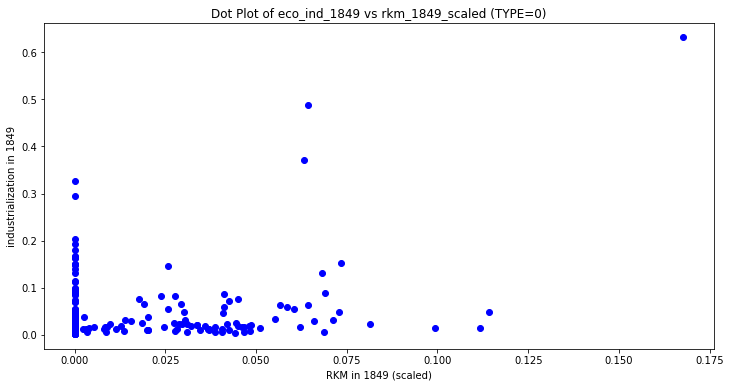

In [ ]:
# filter rows where TYPE=0 and rkm_1849_scaled is not 0
#df_filtered = merged_df[(merged_df['TYPE'] == 0) & (merged_df['rkm_1849_scaled'] != 0)]
df_filtered = merged_df[(merged_df['TYPE'] == 0)]
# create a scatter plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df_filtered['rkm_1849_scaled'], df_filtered['eco_ind_1849'], color='blue')

# set plot title and labels
ax.set_title('Dot Plot of eco_ind_1849 vs rkm_1849_scaled (TYPE=0)')
ax.set_xlabel('RKM in 1849 (scaled)')
ax.set_ylabel('industrialization in 1849')

plt.show()

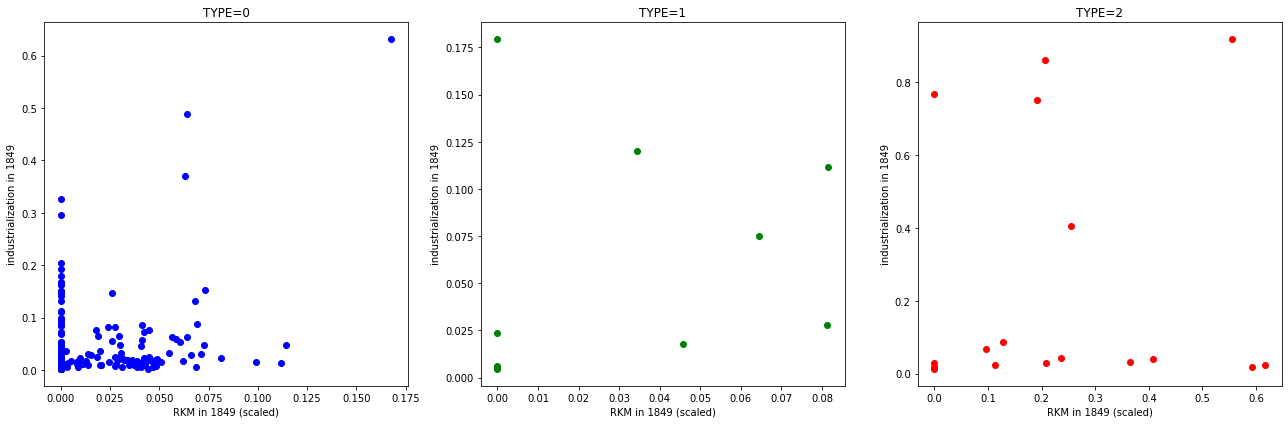

In [ ]:
# filter rows where rkm_1849_scaled is not 0
#df_filtered = merged_df[merged_df['rkm_1849_scaled'] != 0]
df_filtered = merged_df

# create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# plot for TYPE=0
df_type_0 = df_filtered[df_filtered['TYPE'] == 0]
axs[0].scatter(df_type_0['rkm_1849_scaled'], df_type_0['eco_ind_1849'], color='blue')
axs[0].set_title('TYPE=0')
axs[0].set_xlabel('RKM in 1849 (scaled)')
axs[0].set_ylabel('industrialization in 1849')

# plot for TYPE=1
df_type_1 = df_filtered[df_filtered['TYPE'] == 1]
axs[1].scatter(df_type_1['rkm_1849_scaled'], df_type_1['eco_ind_1849'], color='green')
axs[1].set_title('TYPE=1')
axs[1].set_xlabel('RKM in 1849 (scaled)')
axs[1].set_ylabel('industrialization in 1849')

# plot for TYPE=2
df_type_2 = df_filtered[df_filtered['TYPE'] == 2]
axs[2].scatter(df_type_2['rkm_1849_scaled'], df_type_2['eco_ind_1849'], color='red')
axs[2].set_title('TYPE=2')
axs[2].set_xlabel('RKM in 1849 (scaled)')
axs[2].set_ylabel('industrialization in 1849')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()


In [ ]:
for c_year in range(1831, 1876):
    c_col = f'c_{c_year}'
    p_col = f'p_{c_year}'

    if p_col not in merged_df.columns:
        # find the nearest year with a population column available
        c_years_diff = np.array([int(col.split('_')[1]) - c_year for col in merged_df.columns if col.startswith('c_')])
        p_years_diff = np.array([int(col.split('_')[1]) - c_year for col in merged_df.columns if col.startswith('p_')])
        c_nearest_year = int(merged_df.columns[c_years_diff.argsort()[0]])
        p_nearest_year = int(merged_df.columns[p_years_diff.argsort()[0]])
        p_col = f'p_{p_nearest_year}'

    print(f"For c_{c_year}, nearest p_year is {p_col}")


For c_1831, nearest p_year is p_1831


ValueError: ignored

In [ ]:
years = []
for year in range(1837, 1840):
    years.append(str(year))
cols = [f"rkm_{year}_scaled" for year in years]
merged_df["rkm_scaled_1830s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = []
for year in range(1840, 1850):
    years.append(str(year))
cols = [f"rkm_{year}_scaled" for year in years]
merged_df["rkm_scaled_1840s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = []
for year in range(1850, 1860):
    years.append(str(year))
cols = [f"rkm_{year}_scaled" for year in years]
merged_df["rkm_scaled_1850s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = []
for year in range(1860, 1870):
    years.append(str(year))
cols = [f"rkm_{year}_scaled" for year in years]
merged_df["rkm_scaled_1860s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = []
for year in range(1870, 1876):
    years.append(str(year))
cols = [f"rkm_{year}_scaled" for year in years]
merged_df["rkm_scaled_1870s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

#merged_df.head(40)

# man c_rate ro kardam crate

In [ ]:
#
merged_df["crate_1831"] = merged_df["c_1831"]/merged_df["p_1831"]
merged_df["crate_1832"] = merged_df["c_1832"]/merged_df["p_1831"]
merged_df["crate_1833"] = merged_df["c_1833"]/merged_df["p_1831"]
merged_df["crate_1836"] = merged_df["c_1836"]/merged_df["p_1837"]
merged_df["crate_1837"] = merged_df["c_1837"]/merged_df["p_1837"]

years = ["1831", "1832", "1833", "1836", "1837"]
cols = [f"crate_{year}" for year in years]
merged_df["crate_1830s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

merged_df["crate_1848"] = merged_df["c_1848"]/merged_df["p_1849"]
merged_df["crate_1849"] = merged_df["c_1849"]/merged_df["p_1849"]

years = ["1848", "1849"]
cols = [f"crate_{year}" for year in years]
merged_df["crate_1840s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

merged_df["crate_1850"] = merged_df["c_1850"]/merged_df["p_1849"]
merged_df["crate_1851"] = merged_df["c_1851"]/merged_df["p_1852"]
merged_df["crate_1852"] = merged_df["c_1852"]/merged_df["p_1852"]
merged_df["crate_1853"] = merged_df["c_1853"]/merged_df["p_1852"]
merged_df["crate_1854"] = merged_df["c_1854"]/merged_df["p_1855"]
merged_df["crate_1855"] = merged_df["c_1855"]/merged_df["p_1855"]
merged_df["crate_1856"] = merged_df["c_1856"]/merged_df["p_1855"]
merged_df["crate_1857"] = merged_df["c_1857"]/merged_df["p_1855"]
merged_df["crate_1858"] = merged_df["c_1858"]/merged_df["p_1855"]
merged_df["crate_1859"] = merged_df["c_1859"]/merged_df["p_1861"]

years = ["1850", "1851", "1852", "1853", "1854", "1855", "1856", "1857", "1859", "1859"]
cols = [f"c_rate_{year}" for year in years]
merged_df["crate_1850s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

merged_df["crate_1866"] = merged_df["c_1866"]/merged_df["p_1867"]
merged_df["crate_1867"] = merged_df["c_1867"]/merged_df["p_1867"]
merged_df["crate_1868"] = merged_df["c_1868"]/merged_df["p_1867"]

years = ["1866", "1867", "1868"]
cols = [f"crate_{year}" for year in years]
merged_df["crate_1860s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

merged_df["crate_1873"] = merged_df["c_1873"]/merged_df["p_1871"]
merged_df["crate_1874"] = merged_df["c_1874"]/merged_df["p_1875"]

years = ["1873", "1874"]
cols = [f"crate_{year}" for year in years]
merged_df["crate_1870s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

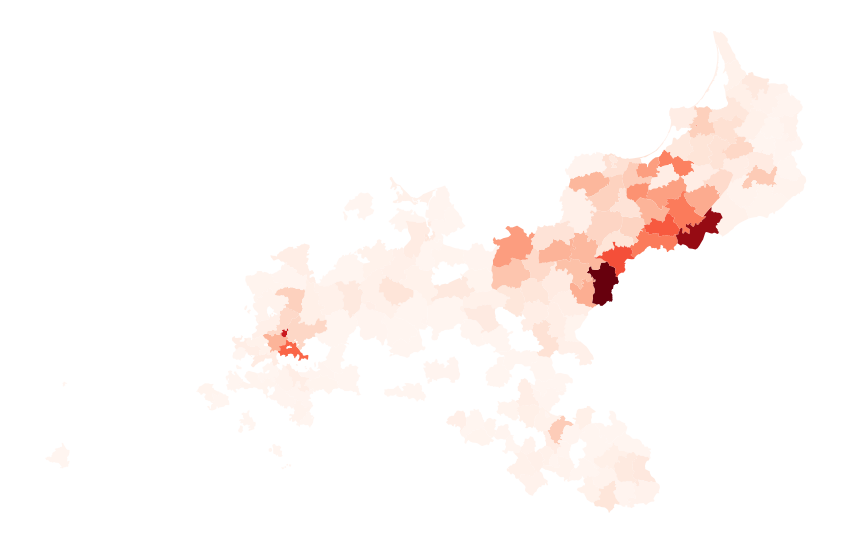

In [ ]:
ax = merged_df.plot(column='c_rate_1870s', cmap='Reds', legend=False, figsize=(15, 15))
ax.axis('off')
plt.show()

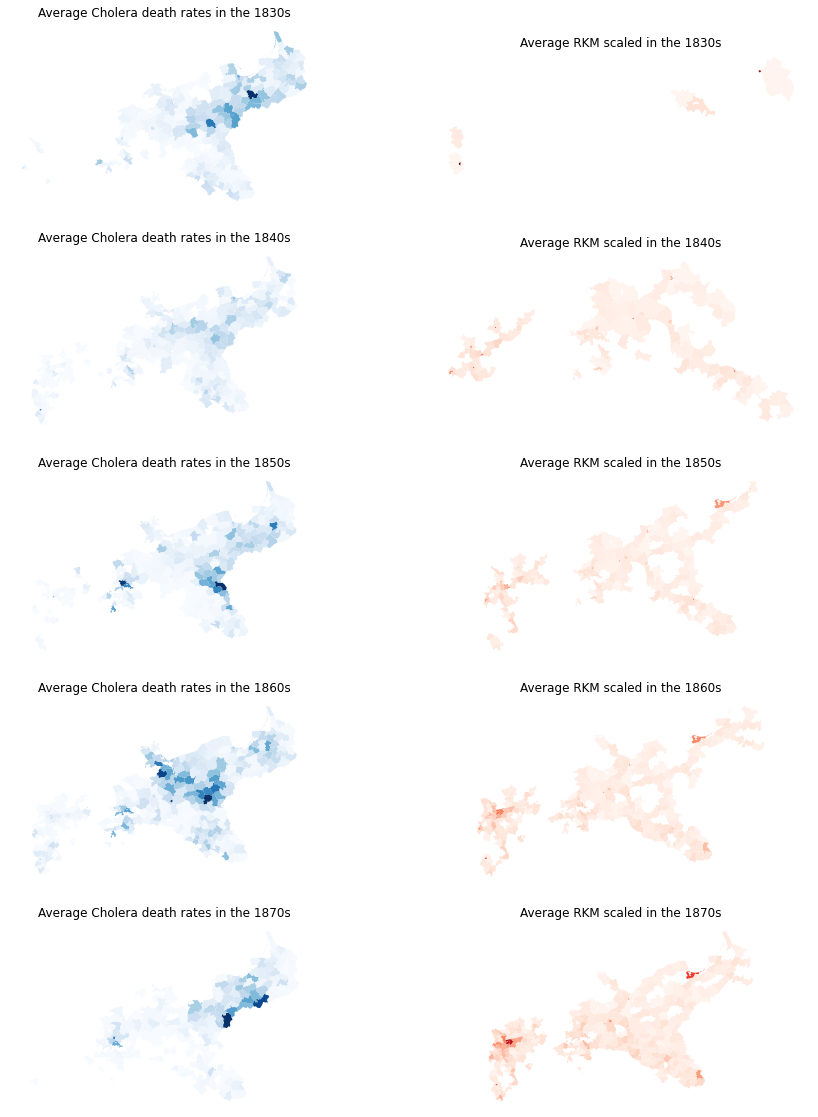

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Create a grid of subplots with 5 rows and 2 columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten the axes array to a 1D list for easier indexing
axes = axes.flatten()

# Iterate over the axes and plot each map on a different subplot
for i, year in enumerate([1830, 1840, 1850, 1860, 1870]):
    # Plot the left map with cholera rates
    merged_df.plot(column=f'c_rate_{year}s', cmap='Blues', legend=False, ax=axes[2*i])
    axes[2*i].set_title(f'Average Cholera death rates in the {year}s')
    axes[2*i].axis('off')

    # Plot the right map with river distances
    merged_df.plot(column=f'rkm_scaled_{year}s', cmap='Reds', legend=False, ax=axes[2*i+1])
    axes[2*i+1].set_title(f'Average RKM scaled in the {year}s')
    axes[2*i+1].axis('off')

# Adjust the spacing between subplots and show the plot
#plt.subplots_adjust(hspace=0.3, wspace=0.1)
plt.show()
fig.savefig('myplot.png', dpi=300)
files.download('myplot.png')

In [ ]:
years = []
for year in range(1837, 1840):
    years.append(str(year))
cols = [f"rkm_{year}" for year in years]
merged_df["rkm_1830s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = []
for year in range(1840, 1850):
    years.append(str(year))
cols = [f"rkm_{year}" for year in years]
merged_df["rkm_1840s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = []
for year in range(1850, 1860):
    years.append(str(year))
cols = [f"rkm_{year}" for year in years]
merged_df["rkm_1850s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = []
for year in range(1860, 1870):
    years.append(str(year))
cols = [f"rkm_{year}" for year in years]
merged_df["rkm_1860s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = []
for year in range(1870, 1876):
    years.append(str(year))
cols = [f"rkm_{year}" for year in years]
merged_df["rkm_1870s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

#merged_df.head(40)

In [ ]:
years = ["1831", "1832", "1833", "1836", "1837"]
cols = [f"c_{year}" for year in years]
merged_df["c_1830s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = ["1848", "1849"]
cols = [f"c_{year}" for year in years]
merged_df["c_1840s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = ["1850", "1851", "1852", "1853", "1854", "1855", "1856", "1857", "1859", "1859"]
cols = [f"c_{year}" for year in years]
merged_df["c_1850s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = ["1866", "1867", "1868"]
cols = [f"c_{year}" for year in years]
merged_df["c_1860s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

years = ["1873", "1874"]
cols = [f"c_{year}" for year in years]
merged_df["c_1870s"] = merged_df[cols].apply(lambda row: row[row.notnull() & (row != 0)].mean(), axis=1)

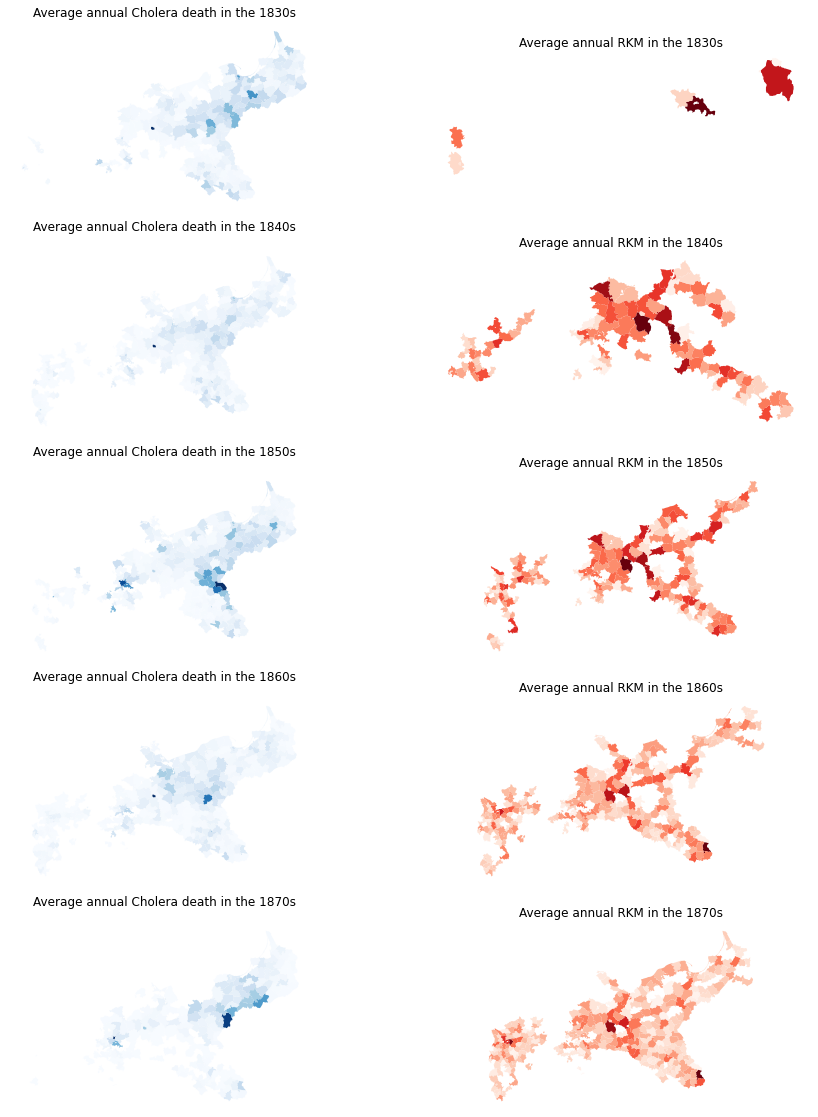

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Create a grid of subplots with 5 rows and 2 columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten the axes array to a 1D list for easier indexing
axes = axes.flatten()

# Iterate over the axes and plot each map on a different subplot
for i, year in enumerate([1830, 1840, 1850, 1860, 1870]):
    # Plot the left map with cholera rates
    merged_df.plot(column=f'c_{year}s', cmap='Blues', legend=False, ax=axes[2*i])
    axes[2*i].set_title(f'Average annual Cholera death in the {year}s')
    axes[2*i].axis('off')

    # Plot the right map with river distances
    merged_df.plot(column=f'rkm_{year}s', cmap='Reds', legend=False, ax=axes[2*i+1])
    axes[2*i+1].set_title(f'Average annual RKM in the {year}s')
    axes[2*i+1].axis('off')

# Adjust the spacing between subplots and show the plot
#plt.subplots_adjust(hspace=0.3, wspace=0.1)
plt.show()
fig.savefig('myplot.png', dpi=300)
files.download('myplot.png')

# The relationship between population growth and cholera incidence

In [ ]:
# Create a list of years from 1837 to 1874
years = [str(year) for year in range(1821, 1876)]

# Create a new DataFrame with columns for year, sum_rkm, and sum_area
new_df = pd.DataFrame({'year': years})

# Loop over the years and calculate the sum of rkm and area for each year
for i, year in enumerate(years):
    if f'p_{year}' in merged_df.columns:
        sum_p = merged_df[f'p_{year}'][(merged_df['TYPE'] == 0) | (merged_df['TYPE'] == 1)].sum()
        new_df.at[i, 'sum_p'] = sum_p
    if f'c_{year}' in merged_df.columns:
        sum_c = merged_df[f'c_{year}'][(merged_df['TYPE'] == 0) | (merged_df['TYPE'] == 1)].sum()
        new_df.at[i, 'sum_c'] = sum_c
#new_df.head(30)

In [ ]:
# create a new dataframe to hold mean rkm scaled values for each year
mean_rkm_df = pd.DataFrame(columns=['Year', 'cholera'])

# iterate over each year
for year in range(1821, 1876):
    # check if the column exists for the current year
    if f'c_{year}' in merged_df.columns:
        # filter rows for the current year
        year_df1 = merged_df[merged_df[f'c_{year}'].notnull()]
        # filter rows with TYPE=0
        year_df1 = year_df1[year_df1['TYPE'] == 2]
        # calculate the mean of p_year for the current year
        mean_p1 = year_df1[f'c_{year}'].sum()
        # add the mean to the mean_p_df dataframe
        mean_rkm_df = mean_rkm_df.append({'Year': year, 'cholera': mean_p1}, ignore_index=True)

# create a new dataframe to hold mean p_year values for each year
mean_p_df = pd.DataFrame(columns=['Year', 'pop'])

# iterate over each year
for year in range(1821, 1876):
    # check if the column exists for the current year
    if f'p_{year}' in merged_df.columns:
        # filter rows for the current year
        year_df = merged_df[merged_df[f'p_{year}'].notnull()]
        # filter rows with TYPE=0
        year_df = year_df[year_df['TYPE'] == 2]
        # calculate the mean of p_year for the current year
        mean_p = year_df[f'p_{year}'].sum()
        # add the mean to the mean_p_df dataframe
        mean_p_df = mean_p_df.append({'Year': year, 'pop': mean_p}, ignore_index=True)

# create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 10))

# plot the mean rkm scaled values on the left y-axis
color1 = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean RKM Scaled', color=color1)
ax1.plot(mean_rkm_df['Year'], mean_rkm_df['cholera'], color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# create a second y-axis on the right side
ax2 = ax1.twinx()

# plot the mean p values on the right y-axis
color2 = 'tab:blue'
ax2.set_ylabel('Population', color=color2)
ax2.plot(mean_p_df['Year'], mean_p_df['pop'], color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# set the title and show the plot
plt.title('Mean RKM Scaled and Mean Population for type 2 over years')
plt.show()


In [ ]:
# create a new dataframe to hold mean rkm scaled values for each year
mean_rkm_df1 = pd.DataFrame(columns=['Year', 'cholera'])

# iterate over each year
for year in range(1821, 1876):
    # check if the column exists for the current year
    if f'c_{year}' in merged_df.columns:
        # filter rows for the current year
        year_df2 = merged_df[merged_df[f'c_{year}'].notnull()]
        # filter rows with TYPE=0
        year_df2 = year_df2[year_df2['TYPE'] == 0]
        # calculate the mean of p_year for the current year
        mean_p3 = year_df2[f'c_{year}'].sum()
        # add the mean to the mean_p_df dataframe
        mean_rkm_df1 = mean_rkm_df1.append({'Year': year, 'cholera': mean_p3}, ignore_index=True)

# create a new dataframe to hold mean p_year values for each year
mean_p_df1 = pd.DataFrame(columns=['Year', 'pop'])

# iterate over each year
for year in range(1821, 1876):
    # check if the column exists for the current year
    if f'p_{year}' in merged_df.columns:
        # filter rows for the current year
        year_df3 = merged_df[merged_df[f'p_{year}'].notnull()]
        # filter rows with TYPE=0
        year_df3 = year_df3[year_df3['TYPE'] == 0]
        # calculate the mean of p_year for the current year
        mean_p4 = year_df3[f'p_{year}'].sum()
        # add the mean to the mean_p_df dataframe
        mean_p_df1 = mean_p_df1.append({'Year': year, 'pop': mean_p4}, ignore_index=True)

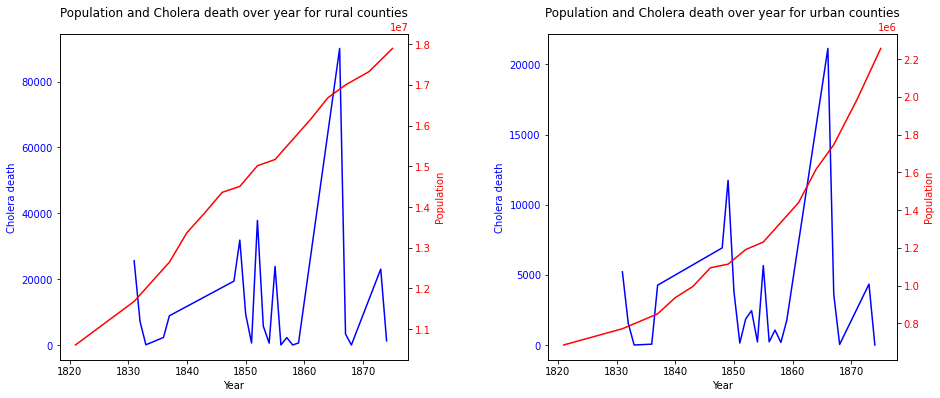

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for TYPE = 0 & 1
ax1 = axs[0]
ax1.plot(mean_rkm_df1['Year'], mean_rkm_df1['cholera'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Cholera death', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Population and Cholera death over year for rural counties')

ax2 = ax1.twinx()
ax2.plot(mean_p_df1['Year'], mean_p_df1['pop'], color='red')
ax2.set_ylabel('Population', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Plot for TYPE = 2
ax3 = axs[1]
ax3.plot(mean_rkm_df['Year'], mean_rkm_df['cholera'], color='blue')
ax3.set_xlabel('Year')
ax3.set_ylabel('Cholera death', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_title('Population and Cholera death over year for urban counties')

ax4 = ax3.twinx()
ax4.plot(mean_p_df['Year'], mean_p_df['pop'], color='red')
ax4.set_ylabel('Population', color='red')
ax4.tick_params(axis='y', labelcolor='red')

# Set title for the entire figure
#fig.suptitle('Population and scaled RKM over year for rural and urban counties')

fig.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()
fig.savefig('myplot.png', dpi=300)
files.download('myplot.png')

# The relationship between economic growth and cholera incidence

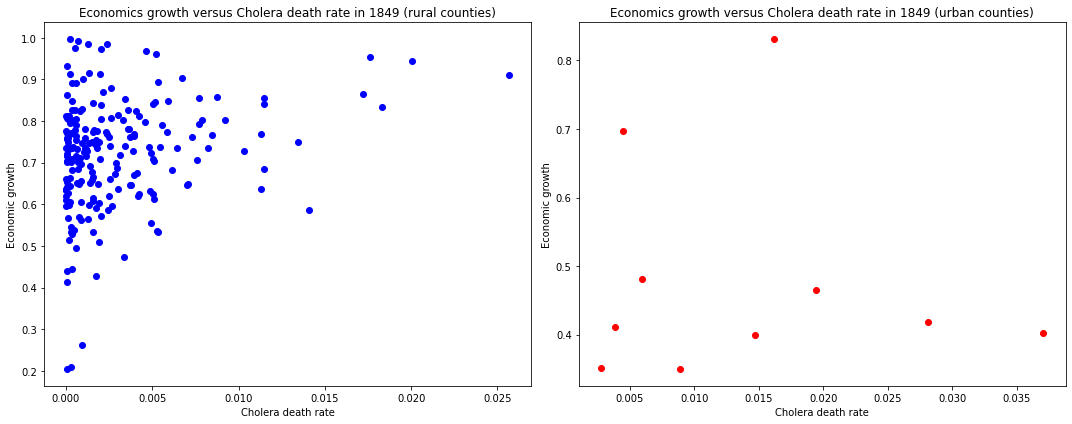

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# filter rows where rkm_1849_scaled is not 0
#df_filtered = merged_df[merged_df['rkm_1849_scaled'] != 0]
merged_df["c_rate_1849"] = merged_df["c_1849"]/merged_df["p_1849"]
merged_df['eco_growth_1849'] = (merged_df['o_ind_1849'] + merged_df['o_serv_1849'] + merged_df['o_agr_1849'] + merged_df['o_craft_1849']) / merged_df['p_1849']
df_filtered = merged_df

# create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# plot for TYPE=0
df_type_0 = df_filtered[(df_filtered['TYPE'] == 0) & (merged_df['c_rate_1849'] != 0) & (merged_df['eco_growth_1849'] < 1)]
axs[0].scatter(df_type_0['c_rate_1849'], df_type_0['eco_growth_1849'], color='blue')
axs[0].set_title('Economics growth versus Cholera death rate in 1849 (rural counties)')
axs[0].set_xlabel('Cholera death rate')
axs[0].set_ylabel('Economic growth')

# plot for TYPE=1
df_type_1 = df_filtered[(df_filtered['TYPE'] == 2) & (merged_df['c_rate_1849'] != 0) & (merged_df['eco_growth_1849'] < 1)]
axs[1].scatter(df_type_1['c_rate_1849'], df_type_1['eco_growth_1849'], color='red')
axs[1].set_title('Economics growth versus Cholera death rate in 1849 (urban counties)')
axs[1].set_xlabel('Cholera death rate')
axs[1].set_ylabel('Economic growth')


# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()
fig.savefig('myplot.png', dpi=300)
files.download('myplot.png')

# The relationship between industrialization and cholera incidence

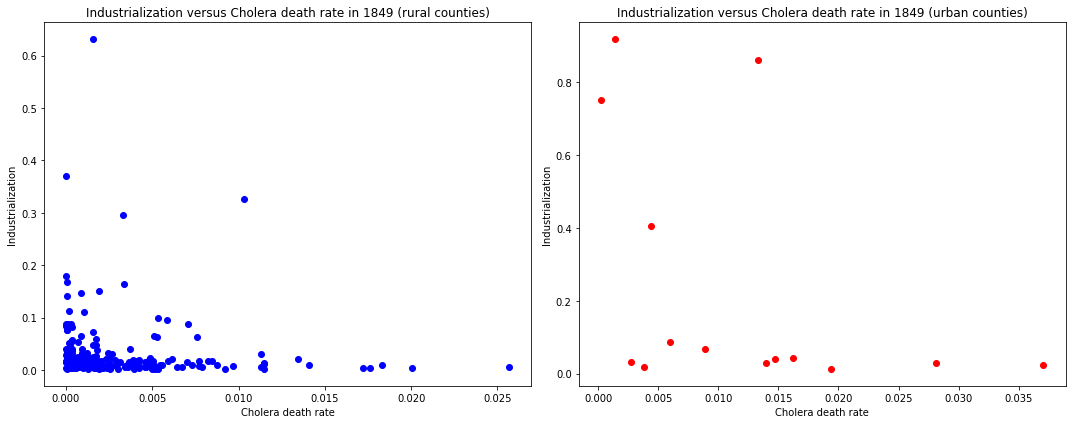

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# filter rows where rkm_1849_scaled is not 0
#df_filtered = merged_df[merged_df['rkm_1849_scaled'] != 0]
merged_df['eco_ind_1849'] = (merged_df['o_ind_1849']) / merged_df['p_1849']
df_filtered = merged_df

# create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# plot for TYPE=0
df_type_0 = df_filtered[(df_filtered['TYPE'] == 0) & (merged_df['c_rate_1849'] != 0)]
axs[0].scatter(df_type_0['c_rate_1849'], df_type_0['eco_ind_1849'], color='blue')
axs[0].set_title('Industrialization versus Cholera death rate in 1849 (rural counties)')
axs[0].set_xlabel('Cholera death rate')
axs[0].set_ylabel('Industrialization')

# plot for TYPE=1
df_type_1 = df_filtered[(df_filtered['TYPE'] == 2) & (merged_df['c_rate_1849'] != 0)]
axs[1].scatter(df_type_1['c_rate_1849'], df_type_1['eco_ind_1849'], color='red')
axs[1].set_title('Industrialization versus Cholera death rate in 1849 (urban counties)')
axs[1].set_xlabel('Cholera death rate')
axs[1].set_ylabel('Industrialization')


# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()
fig.savefig('myplot.png', dpi=300)
files.download('myplot.png')

# FIXED EFFECT

In [ ]:
merged_df["pnew_1831"] = merged_df["p_1831"]
merged_df["pnew_1832"] = merged_df["p_1831"]
merged_df["pnew_1833"] = merged_df["p_1831"]
merged_df["pnew_1836"] = merged_df["p_1837"]
merged_df["pnew_1837"] = merged_df["p_1837"]

merged_df["pnew_1848"] = merged_df["p_1849"]
merged_df["pnew_1849"] = merged_df["p_1849"]

merged_df["pnew_1850"] = merged_df["p_1849"]
merged_df["pnew_1851"] = merged_df["p_1852"]
merged_df["pnew_1852"] = merged_df["p_1852"]
merged_df["pnew_1853"] = merged_df["p_1852"]
merged_df["pnew_1854"] = merged_df["p_1855"]
merged_df["pnew_1855"] = merged_df["p_1855"]
merged_df["pnew_1856"] = merged_df["p_1855"]
merged_df["pnew_1857"] = merged_df["p_1855"]
merged_df["pnew_1858"] = merged_df["p_1855"]
merged_df["pnew_1859"] = merged_df["p_1861"]

merged_df["pnew_1866"] = merged_df["p_1867"]
merged_df["pnew_1867"] = merged_df["p_1867"]
merged_df["pnew_1868"] = merged_df["p_1867"]

merged_df["pnew_1873"] = merged_df["p_1871"]
merged_df["pnew_1874"] = merged_df["p_1875"]

In [ ]:
print(merged_df.columns.tolist())

['NAME', 'RBZ', 'TYPE', 'geometry', 'org_type', 'org_name', 'match_name', 'match_type', 'org_rbz', 'org_prv', 'match_rbz', 'o_craft_1849', 'o_ind_1849', 'o_serv_1849', 'o_agr_1849', 'p_1821', 'p_1831', 'c_1831', 'c_1832', 'c_1833', 'p_1837', 'c_1836', 'c_1837', 'p_1840', 'p_1843', 'p_1846', 'c_1848', 'p_1849', 'c_1849', 'c_1850', 'c_1851', 'p_1852', 'c_1852', 'c_1853', 'c_1854', 'p_1855', 'c_1855', 'c_1856', 'c_1857', 'c_1858', 'c_1859', 'p_1861', 'p_1864', 'c_1866', 'p_1867', 'c_1867', 'c_1868', 'p_1871', 'c_1873', 'c_1874', 'p_1875', 'rkm_1875', 'rkm_1874', 'rkm_1873', 'rkm_1872', 'rkm_1871', 'rkm_1870', 'rkm_1869', 'rkm_1868', 'rkm_1867', 'rkm_1866', 'rkm_1865', 'rkm_1864', 'rkm_1863', 'rkm_1862', 'rkm_1861', 'rkm_1860', 'rkm_1859', 'rkm_1858', 'rkm_1857', 'rkm_1856', 'rkm_1855', 'rkm_1854', 'rkm_1853', 'rkm_1852', 'rkm_1851', 'rkm_1850', 'rkm_1849', 'rkm_1848', 'rkm_1847', 'rkm_1846', 'rkm_1845', 'rkm_1844', 'rkm_1843', 'rkm_1842', 'rkm_1841', 'rkm_1840', 'rkm_1839', 'rkm_1838', 'r

In [ ]:
merged_df['ID'] = range(1, len(merged_df)+1)

In [ ]:
years = [str(year) for year in range(1840, 1846)]
new_dataset1 = merged_df[["rkm_" + year for year in years]]
new_dataset1.head()

,rkm_1840,rkm_1841,rkm_1842,rkm_1843,rkm_1844,rkm_1845
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
years = [str(year) for year in [1837, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1866, 1867, 1868, 1873, 1874]]
rkm_columns = ["rkm_" + year for year in years]
rkm_scaled_columns = ["scaledrkm_" + year for year in years]
c_columns = ["c_" + year for year in years]
c_rate_columns = ["crate_" + year for year in years]
p_columns = ["pnew_" + year for year in years]
# new_dataset = merged_df[(merged_df['TYPE'] == 0) | (merged_df['TYPE'] == 1)][['ID'] + c_columns + rkm_columns + p_columns + c_rate_columns + rkm_scaled_columns]
new_dataset = merged_df[(merged_df['TYPE'] == 2)][['ID'] + c_columns + rkm_columns + p_columns + c_rate_columns + rkm_scaled_columns]

In [ ]:
new_dataset.columns

Index(['ID', 'c_1837', 'c_1848', 'c_1849', 'c_1850', 'c_1851', 'c_1852',
       'c_1853', 'c_1854', 'c_1855', 'c_1856', 'c_1857', 'c_1858', 'c_1859',
       'c_1866', 'c_1867', 'c_1868', 'c_1873', 'c_1874', 'rkm_1837',
       'rkm_1848', 'rkm_1849', 'rkm_1850', 'rkm_1851', 'rkm_1852', 'rkm_1853',
       'rkm_1854', 'rkm_1855', 'rkm_1856', 'rkm_1857', 'rkm_1858', 'rkm_1859',
       'rkm_1866', 'rkm_1867', 'rkm_1868', 'rkm_1873', 'rkm_1874', 'pnew_1837',
       'pnew_1848', 'pnew_1849', 'pnew_1850', 'pnew_1851', 'pnew_1852',
       'pnew_1853', 'pnew_1854', 'pnew_1855', 'pnew_1856', 'pnew_1857',
       'pnew_1858', 'pnew_1859', 'pnew_1866', 'pnew_1867', 'pnew_1868',
       'pnew_1873', 'pnew_1874', 'crate_1837', 'crate_1848', 'crate_1849',
       'crate_1850', 'crate_1851', 'crate_1852', 'crate_1853', 'crate_1854',
       'crate_1855', 'crate_1856', 'crate_1857', 'crate_1858', 'crate_1859',
       'crate_1866', 'crate_1867', 'crate_1868', 'crate_1873', 'crate_1874',
       'scaledrkm_183

In [ ]:
# create empty dataframe for long format data
df_long1 = pd.DataFrame()

# add ID column to long format dataframe
df_long1['ID'] = new_dataset['ID']

# create a list of year columns from the original dataset
year_cols = [col for col in new_dataset.columns if col.startswith('c_')]

# iterate through each year column
for col in year_cols:
    # get the year from the column name
    year = col.split('_')[1]
    # get the variable name from the column name
    var = col.split('_')[0]
    # create a temporary dataframe with ID, year, and value columns
    temp = new_dataset[['ID', col]].rename(columns={col: var})
    temp['year'] = year
    # append the temporary dataframe to the long format dataframe
    df_long1 = df_long1.append(temp, ignore_index=True)

# filter out rows where the value of column 'c' is NaN
df_long1 = df_long1[df_long1['c'].notna()]

# convert values of column 'c' to float
df_long1['c'] = df_long1['c'].astype(float)
df_long1.head()

In [ ]:
# create empty dataframe for long format data
df_long2 = pd.DataFrame()

# add ID column to long format dataframe
df_long2['ID'] = new_dataset['ID']

# create a list of year columns from the original dataset
year_cols = [col for col in new_dataset.columns if col.startswith('rkm_')]

# iterate through each year column
for col in year_cols:
    # get the year from the column name
    year = col.split('_')[1]
    # get the variable name from the column name
    var = col.split('_')[0]
    # create a temporary dataframe with ID, year, and value columns
    temp = new_dataset[['ID', col]].rename(columns={col: var})
    temp['year'] = year
    # append the temporary dataframe to the long format dataframe
    df_long2 = df_long2.append(temp, ignore_index=True)

# filter out rows where the value of column 'c' is NaN
df_long2 = df_long2[df_long2['rkm'].notna()]

# convert values of column 'c' to float
df_long2['rkm'] = df_long2['rkm'].astype(float)
df_long2.head()

In [ ]:
# create empty dataframe for long format data
df_long3 = pd.DataFrame()

# add ID column to long format dataframe
df_long3['ID'] = new_dataset['ID']

# create a list of year columns from the original dataset
year_cols = [col for col in new_dataset.columns if col.startswith('pnew_')]

# iterate through each year column
for col in year_cols:
    # get the year from the column name
    year = col.split('_')[1]
    # get the variable name from the column name
    var = col.split('_')[0]
    # create a temporary dataframe with ID, year, and value columns
    temp = new_dataset[['ID', col]].rename(columns={col: var})
    temp['year'] = year
    # append the temporary dataframe to the long format dataframe
    df_long3 = df_long3.append(temp, ignore_index=True)

# filter out rows where the value of column 'c' is NaN
df_long3 = df_long3[df_long3['pnew'].notna()]

# convert values of column 'c' to float
df_long3['pnew'] = df_long3['pnew'].astype(float)
df_long3.head()

In [ ]:
# create empty dataframe for long format data
df_long4 = pd.DataFrame()

# add ID column to long format dataframe
df_long4['ID'] = new_dataset['ID']

# create a list of year columns from the original dataset
year_cols = [col for col in new_dataset.columns if col.startswith('scaledrkm_')]

# iterate through each year column
for col in year_cols:
    # get the year from the column name
    year = col.split('_')[1]
    # get the variable name from the column name
    var = col.split('_')[0]
    # create a temporary dataframe with ID, year, and value columns
    temp = new_dataset[['ID', col]].rename(columns={col: var})
    temp['year'] = year
    # append the temporary dataframe to the long format dataframe
    df_long4 = df_long4.append(temp, ignore_index=True)

# filter out rows where the value of column 'c' is NaN
df_long4 = df_long4[df_long4['scaledrkm'].notna()]

# convert values of column 'c' to float
df_long4['scaledrkm'] = df_long4['scaledrkm'].astype(float)
df_long4.head()

In [ ]:
# create empty dataframe for long format data
df_long5 = pd.DataFrame()

# add ID column to long format dataframe
df_long5['ID'] = new_dataset['ID']

# create a list of year columns from the original dataset
year_cols = [col for col in new_dataset.columns if col.startswith('crate_')]

# iterate through each year column
for col in year_cols:
    # get the year from the column name
    year = col.split('_')[1]
    # get the variable name from the column name
    var = col.split('_')[0]
    # create a temporary dataframe with ID, year, and value columns
    temp = new_dataset[['ID', col]].rename(columns={col: var})
    temp['year'] = year
    # append the temporary dataframe to the long format dataframe
    df_long5 = df_long5.append(temp, ignore_index=True)

# filter out rows where the value of column 'c' is NaN
df_long5 = df_long5[df_long5['crate'].notna()]

# convert values of column 'c' to float
df_long5['crate'] = df_long5['crate'].astype(float)
df_long5.head()

In [ ]:
# merge all dataframes together based on ID and year columns
df_long = pd.merge(df_long2, df_long1, on=['ID', 'year'])
df_long = pd.merge(df_long3, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long4, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long5, df_long, on=['ID', 'year'])

df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
# print merged dataframe
# print(df_long)
# df_long.to_csv('df_long.csv', index=False)
# files.download('df_long.csv')

from linearmodels.panel import PanelOLS
year = pd.Categorical(df_long.year)
df_long = df_long.set_index(["ID", "year"])
df_long["year"] = year
exog_vars = ["rkm"]
exog = sm.add_constant(df_long[exog_vars])
mod = PanelOLS(df_long.c, exog, entity_effects=True, time_effects=True, drop_absorbed=True, check_rank=False)
m1 = mod.fit()
print(m1)

                          PanelOLS Estimation Summary                           
Dep. Variable:                      c   R-squared:                        0.0028
Estimator:                   PanelOLS   R-squared (Between):              0.0277
No. Observations:                5867   R-squared (Within):               0.0029
Date:                Fri, Mar 24 2023   R-squared (Overall):              0.0057
Time:                        00:45:07   Log-likelihood                -3.752e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      15.514
Entities:                         326   P-value                           0.0001
Avg Obs:                       17.997   Distribution:                  F(1,5523)
Min Obs:                       17.000                                           
Max Obs:                       18.000   F-statistic (robust):             15.514
                            

In [ ]:
# merge all dataframes together based on ID and year columns
df_long = pd.merge(df_long2, df_long1, on=['ID', 'year'])
df_long = pd.merge(df_long3, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long4, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long5, df_long, on=['ID', 'year'])

df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
# print merged dataframe
# print(df_long)
# df_long.to_csv('df_long.csv', index=False)
# files.download('df_long.csv')

from linearmodels.panel import PanelOLS
year = pd.Categorical(df_long.year)
df_long = df_long.set_index(["ID", "year"])
df_long["year"] = year
exog_vars = ["rkm", "pnew"]
exog = sm.add_constant(df_long[exog_vars])
mod = PanelOLS(df_long.c, exog, entity_effects=True, time_effects=True, drop_absorbed=True, check_rank=False)
m2 = mod.fit()
print(m2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                      c   R-squared:                        0.0064
Estimator:                   PanelOLS   R-squared (Between):              0.0804
No. Observations:                5867   R-squared (Within):               0.0076
Date:                Fri, Mar 24 2023   R-squared (Overall):              0.0157
Time:                        00:45:11   Log-likelihood                -3.751e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.800
Entities:                         326   P-value                           0.0000
Avg Obs:                       17.997   Distribution:                  F(2,5522)
Min Obs:                       17.000                                           
Max Obs:                       18.000   F-statistic (robust):             17.800
                            

In [ ]:
# merge all dataframes together based on ID and year columns
df_long = pd.merge(df_long2, df_long1, on=['ID', 'year'])
df_long = pd.merge(df_long3, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long4, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long5, df_long, on=['ID', 'year'])

df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
# print merged dataframe
# print(df_long)
# df_long.to_csv('df_long.csv', index=False)
# files.download('df_long.csv')

from linearmodels.panel import PanelOLS
year = pd.Categorical(df_long.year)
df_long = df_long.set_index(["ID", "year"])
df_long["year"] = year
exog_vars = ["rkm"]
exog = sm.add_constant(df_long[exog_vars])
mod = PanelOLS(df_long.c, exog, entity_effects=True, time_effects=True, drop_absorbed=True, check_rank=False)
m3 = mod.fit()
print(m3)

                          PanelOLS Estimation Summary                           
Dep. Variable:                      c   R-squared:                        0.0107
Estimator:                   PanelOLS   R-squared (Between):             -0.3538
No. Observations:                 305   R-squared (Within):               0.0037
Date:                Fri, Mar 24 2023   R-squared (Overall):             -0.0560
Time:                        00:45:57   Log-likelihood                   -2298.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.9232
Entities:                          17   P-value                           0.0885
Avg Obs:                       17.941   Distribution:                   F(1,270)
Min Obs:                       17.000                                           
Max Obs:                       18.000   F-statistic (robust):             2.9232
                            

In [ ]:
# merge all dataframes together based on ID and year columns
df_long = pd.merge(df_long2, df_long1, on=['ID', 'year'])
df_long = pd.merge(df_long3, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long4, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long5, df_long, on=['ID', 'year'])

df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
# print merged dataframe
# print(df_long)
# df_long.to_csv('df_long.csv', index=False)
# files.download('df_long.csv')

from linearmodels.panel import PanelOLS
year = pd.Categorical(df_long.year)
df_long = df_long.set_index(["ID", "year"])
df_long["year"] = year
exog_vars = ["rkm", "pnew"]
exog = sm.add_constant(df_long[exog_vars])
mod = PanelOLS(df_long.c, exog, entity_effects=True, time_effects=True, drop_absorbed=True, check_rank=False)
m4 = mod.fit()
print(m4)

                          PanelOLS Estimation Summary                           
Dep. Variable:                      c   R-squared:                        0.0109
Estimator:                   PanelOLS   R-squared (Between):             -0.4892
No. Observations:                 305   R-squared (Within):               0.0033
Date:                Fri, Mar 24 2023   R-squared (Overall):             -0.0790
Time:                        00:46:10   Log-likelihood                   -2298.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.4789
Entities:                          17   P-value                           0.2297
Avg Obs:                       17.941   Distribution:                   F(2,269)
Min Obs:                       17.000                                           
Max Obs:                       18.000   F-statistic (robust):             1.4789
                            

In [ ]:
!pip install pystout

In [ ]:
from pystout import pystout
pystout(models=[m1, m2, m3, m4],
        file='test_table1.tex',
        addnotes=['Note'],
        digits=3,
        endog_names=['FE with Pop', 'FE without Pop', 'FE with Pop', 'FE without Pop'],
        #varlabels={'const':'Constant', 'displacement':'Disp','mpg':'MPG'},
        mgroups={'Rural counties':[1,2],'Urban counties':[3,4]},
        modstat={'nobs':'Obs','rsquared_adj':'Adj. R\sym{2}','fvalue':'F-stat'}
        )

/usr/local/lib/python3.9/dist-packages/pystout/pystout.py:377: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options = options.append(pd.DataFrame([r],index=[value]))
/usr/local/lib/python3.9/dist-packages/pystout/pystout.py:377: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options = options.append(pd.DataFrame([r],index=[value]))
/usr/local/lib/python3.9/dist-packages/pystout/pystout.py:377: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options = options.append(pd.DataFrame([r],index=[value]))


# other FE

In [ ]:
# merge all dataframes together based on ID and year columns
df_long = pd.merge(df_long2, df_long1, on=['ID', 'year'])
df_long = pd.merge(df_long3, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long4, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long5, df_long, on=['ID', 'year'])

df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
# print merged dataframe
# print(df_long)
# df_long.to_csv('df_long.csv', index=False)
# files.download('df_long.csv')

from linearmodels.panel import PanelOLS
year = pd.Categorical(df_long.year)
df_long = df_long.set_index(["ID", "year"])
df_long["year"] = year
exog_vars = ["scaledrkm"]
exog = sm.add_constant(df_long[exog_vars])
mod = PanelOLS(df_long.crate, exog, entity_effects=True, time_effects=True, drop_absorbed=True, check_rank=False)
m1 = mod.fit()
print(m1)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  crate   R-squared:                        0.0007
Estimator:                   PanelOLS   R-squared (Between):             -0.0153
No. Observations:                5867   R-squared (Within):               0.0003
Date:                Fri, Mar 24 2023   R-squared (Overall):             -0.0014
Time:                        00:35:33   Log-likelihood                 2.671e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.6172
Entities:                         326   P-value                           0.0572
Avg Obs:                       17.997   Distribution:                  F(1,5523)
Min Obs:                       17.000                                           
Max Obs:                       18.000   F-statistic (robust):             3.6172
                            

In [ ]:
# merge all dataframes together based on ID and year columns
df_long = pd.merge(df_long2, df_long1, on=['ID', 'year'])
df_long = pd.merge(df_long3, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long4, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long5, df_long, on=['ID', 'year'])

df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
# print merged dataframe
# print(df_long)
# df_long.to_csv('df_long.csv', index=False)
# files.download('df_long.csv')

from linearmodels.panel import PanelOLS
year = pd.Categorical(df_long.year)
df_long = df_long.set_index(["ID", "year"])
df_long["year"] = year
exog_vars = ["scaledrkm", "pnew"]
exog = sm.add_constant(df_long[exog_vars])
mod = PanelOLS(df_long.crate, exog, entity_effects=True, time_effects=True, drop_absorbed=True, check_rank=False)
m2 = mod.fit()
print(m2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  crate   R-squared:                        0.0007
Estimator:                   PanelOLS   R-squared (Between):              0.0010
No. Observations:                5867   R-squared (Within):               0.0007
Date:                Fri, Mar 24 2023   R-squared (Overall):              0.0007
Time:                        00:35:37   Log-likelihood                 2.671e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.0300
Entities:                         326   P-value                           0.1314
Avg Obs:                       17.997   Distribution:                  F(2,5522)
Min Obs:                       17.000                                           
Max Obs:                       18.000   F-statistic (robust):             2.0300
                            

In [ ]:
# merge all dataframes together based on ID and year columns
df_long = pd.merge(df_long2, df_long1, on=['ID', 'year'])
df_long = pd.merge(df_long3, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long4, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long5, df_long, on=['ID', 'year'])

df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
# print merged dataframe
# print(df_long)
# df_long.to_csv('df_long.csv', index=False)
# files.download('df_long.csv')

from linearmodels.panel import PanelOLS
year = pd.Categorical(df_long.year)
df_long = df_long.set_index(["ID", "year"])
df_long["year"] = year
exog_vars = ["scaledrkm"]
exog = sm.add_constant(df_long[exog_vars])
mod = PanelOLS(df_long.crate, exog, entity_effects=True, time_effects=True, drop_absorbed=True, check_rank=False)
m3 = mod.fit()
print(m3)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  crate   R-squared:                        0.0094
Estimator:                   PanelOLS   R-squared (Between):             -0.4936
No. Observations:                 305   R-squared (Within):               0.0003
Date:                Fri, Mar 24 2023   R-squared (Overall):             -0.0480
Time:                        00:34:25   Log-likelihood                    1186.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.5488
Entities:                          17   P-value                           0.1115
Avg Obs:                       17.941   Distribution:                   F(1,270)
Min Obs:                       17.000                                           
Max Obs:                       18.000   F-statistic (robust):             2.5488
                            

In [ ]:
# merge all dataframes together based on ID and year columns
df_long = pd.merge(df_long2, df_long1, on=['ID', 'year'])
df_long = pd.merge(df_long3, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long4, df_long, on=['ID', 'year'])
df_long = pd.merge(df_long5, df_long, on=['ID', 'year'])

df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
# print merged dataframe
# print(df_long)
# df_long.to_csv('df_long.csv', index=False)
# files.download('df_long.csv')

from linearmodels.panel import PanelOLS
year = pd.Categorical(df_long.year)
df_long = df_long.set_index(["ID", "year"])
df_long["year"] = year
exog_vars = ["scaledrkm", "pnew"]
exog = sm.add_constant(df_long[exog_vars])
mod = PanelOLS(df_long.crate, exog, entity_effects=True, time_effects=True, drop_absorbed=True, check_rank=False)
m4 = mod.fit()
print(m4)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  crate   R-squared:                        0.0116
Estimator:                   PanelOLS   R-squared (Between):             -0.7067
No. Observations:                 305   R-squared (Within):               0.0034
Date:                Fri, Mar 24 2023   R-squared (Overall):             -0.0658
Time:                        00:34:29   Log-likelihood                    1187.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.5737
Entities:                          17   P-value                           0.2092
Avg Obs:                       17.941   Distribution:                   F(2,269)
Min Obs:                       17.000                                           
Max Obs:                       18.000   F-statistic (robust):             1.5737
                            

In [ ]:
from pystout import pystout
pystout(models=[m1, m2, m3, m4],
        file='test_table2.tex',
        addnotes=['Note'],
        digits=3,
        endog_names=['FE with Pop', 'FE without Pop', 'FE with Pop', 'FE without Pop'],
        #varlabels={'const':'Constant', 'displacement':'Disp','mpg':'MPG'},
        mgroups={'Rural counties':[1,2],'Urban counties':[3,4]},
        modstat={'nobs':'Obs','rsquared_adj':'Adj. R\sym{2}','fvalue':'F-stat'}
        )

/usr/local/lib/python3.9/dist-packages/pystout/pystout.py:377: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options = options.append(pd.DataFrame([r],index=[value]))
/usr/local/lib/python3.9/dist-packages/pystout/pystout.py:377: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options = options.append(pd.DataFrame([r],index=[value]))
/usr/local/lib/python3.9/dist-packages/pystout/pystout.py:377: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options = options.append(pd.DataFrame([r],index=[value]))
